In [63]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj

In [24]:
# verileri gadm den aldık,0 ülke, 1 illeri,2 ilçeler, shape 1 seklinde alıypruz
iller=gpd.read_file("C:/Users/Onur/Desktop/turadm/TUR_adm1.shp")

In [25]:
iller.head()
# geometry bizim icin önemliolan

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,235,TUR,Turkey,1,Çanakkale,Il,Province,None,None,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39..."
1,235,TUR,Turkey,2,Çankiri,Il,Province,None,Çankırı|Changra,"POLYGON ((33.78607 40.96249, 33.78677 40.95684..."
2,235,TUR,Turkey,3,Çorum,Il,Province,None,None,"POLYGON ((34.81906 41.20172, 34.84486 41.19581..."
3,235,TUR,Turkey,4,Adana,Il,Province,None,Seyhan,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36..."
4,235,TUR,Turkey,5,Adiyaman,Il,Province,None,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160..."


In [26]:
iller.geometry

0     MULTIPOLYGON (((26.05347 39.84736, 26.05347 39...
1     POLYGON ((33.78607 40.96249, 33.78677 40.95684...
2     POLYGON ((34.81906 41.20172, 34.84486 41.19581...
3     MULTIPOLYGON (((35.27903 36.64069, 35.27903 36...
4     POLYGON ((38.65534 38.09172, 38.66739 38.09160...
                            ...                        
76    POLYGON ((29.89273 38.77788, 29.89274 38.73051...
77    POLYGON ((43.34184 39.39789, 43.35878 39.38728...
78    POLYGON ((29.39486 40.70208, 29.39486 40.70181...
79    POLYGON ((35.34320 40.21666, 35.35103 40.20958...
80    POLYGON ((32.02097 41.56292, 32.02201 41.55926...
Name: geometry, Length: 81, dtype: geometry

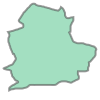

In [27]:
iller.geometry[2]

In [28]:
iller.NAME_1[2] # 0 dan başladıgı için 3. sehir aslında

'Çorum'

<AxesSubplot:>

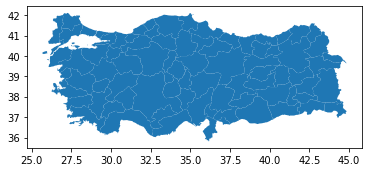

In [29]:
iller.plot()

In [33]:
type(iller) # geodataframe diye özel bir yaının içinde verilerimiz

geopandas.geodataframe.GeoDataFrame

In [35]:
type(iller.geometry) # seri

geopandas.geoseries.GeoSeries

In [45]:
iller.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [47]:
iller.geometry.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [72]:
iller.geometry.area

C:\Users\Onur\AppData\Local\Temp/ipykernel_11860/1964494911.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  iller.geometry.area


0     1.032032
1     0.843826
2     1.309368
3     1.612729
4     0.759168
        ...   
76    0.508203
77    2.179277
78    0.069144
79    1.380989
80    0.328679
Length: 81, dtype: float64

In [84]:
merkezler=iller.geometry.centroid

C:\Users\Onur\AppData\Local\Temp/ipykernel_11860/3329517787.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merkezler=iller.geometry.centroid


In [85]:
iller.geometry.centroid # point olarak alıyoruz

C:\Users\Onur\AppData\Local\Temp/ipykernel_11860/4156511986.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  iller.geometry.centroid # point olarak alıyoruz


0     POINT (26.75106 40.05661)
1     POINT (33.42615 40.68986)
2     POINT (34.66202 40.56634)
3     POINT (35.59445 37.46170)
4     POINT (38.33526 37.80429)
                ...            
76    POINT (29.36163 38.53510)
77    POINT (43.63811 38.47572)
78    POINT (29.11771 40.58542)
79    POINT (35.25198 39.66226)
80    POINT (31.84013 41.25204)
Length: 81, dtype: geometry

In [86]:
merkezler

0     POINT (26.75106 40.05661)
1     POINT (33.42615 40.68986)
2     POINT (34.66202 40.56634)
3     POINT (35.59445 37.46170)
4     POINT (38.33526 37.80429)
                ...            
76    POINT (29.36163 38.53510)
77    POINT (43.63811 38.47572)
78    POINT (29.11771 40.58542)
79    POINT (35.25198 39.66226)
80    POINT (31.84013 41.25204)
Length: 81, dtype: geometry

In [87]:
merkezler.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [88]:
merkezler=merkezler.to_crs(3857)

In [82]:
merkezler

0     POINT (2977914.822 4874172.063)
1     POINT (3720982.519 4966703.557)
2     POINT (3858558.469 4948585.129)
3     POINT (3962356.471 4503658.096)
4     POINT (4267461.197 4551815.604)
                   ...               
76    POINT (3268521.799 4655295.613)
77    POINT (4857771.823 4646849.295)
78    POINT (3241368.281 4951382.487)
79    POINT (3924232.353 4816983.528)
80    POINT (3544427.171 5049589.502)
Length: 81, dtype: geometry

In [83]:
merkezler.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [89]:
type(merkezler)

geopandas.geoseries.GeoSeries

<AxesSubplot:>

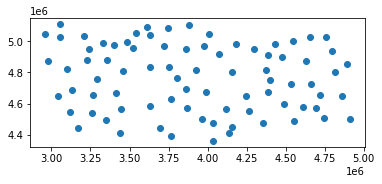

In [91]:
merkezler.plot()

In [95]:
eskişehir=iller[iller["NAME_1"]=="Eskişehir"]

In [99]:
type(eskişehir)

geopandas.geodataframe.GeoDataFrame

In [103]:
ankara=iller[iller["NAME_1"]=="Ankara"]

<AxesSubplot:>

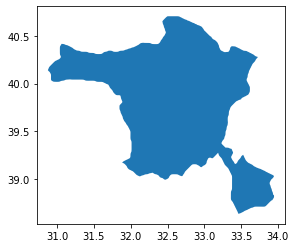

In [104]:
ankara.plot()

<AxesSubplot:>

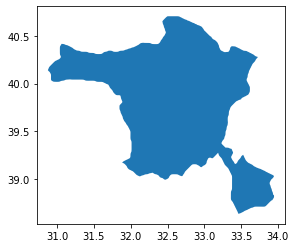

In [109]:
#tampon 
ankara.geometry.buffer(0,1).plot()

In [111]:
print(iller.geometry[2])

POLYGON ((34.81905746459978 41.20172119140625, 34.84485626220697 41.19581222534191, 34.84841918945318 41.19600677490234, 34.8503532409668 41.19662094116205, 34.85211944580095 41.19771957397472, 34.86016845703125 41.2064781188966, 34.87318038940424 41.21832275390625, 34.87919998168968 41.22477722167969, 34.88229751586942 41.2296257019043, 34.88899230957037 41.2441864013673, 34.89210128784197 41.25366210937506, 34.90938186645536 41.24133300781261, 34.91732788085949 41.23485565185541, 34.9220924377442 41.23030853271484, 34.92611312866217 41.22546768188477, 34.93176651000994 41.21565246582031, 34.94060516357416 41.20204162597668, 34.94257354736328 41.19681549072271, 34.94624328613304 41.18352508544933, 34.94852828979487 41.17863464355469, 34.95535278320312 41.16713714599621, 34.95712661743181 41.16148757934582, 34.95837020874029 41.14961624145513, 34.95876312255876 41.12235641479498, 34.96025466918951 41.11354827880854, 34.96244812011724 41.10828018188488, 34.96970748901384 41.096992492675